# 🧠 AI & ML Internship – Task 4  
## Classification using Logistic Regression

### 📌 Objective
The objective of this task is to build a **binary classification model** using Logistic Regression.  
The model predicts whether a tumor is **Malignant (Cancerous)** or **Benign (Non-Cancerous)**.

---

### 📂 Dataset Used
Breast Cancer Wisconsin Dataset  

- Target Variable: `diagnosis`
  - M → Malignant (1)
  - B → Benign (0)
- Total Features: 30 numerical features

---

### 🛠 Tools & Libraries Used
- Python
- Pandas
- NumPy
- Matplotlib
- Scikit-learn

---

### 📊 Task Workflow
1. Data Preprocessing  
2. Train-Test Split  
3. Feature Scaling  
4. Logistic Regression Model Training  
5. Model Evaluation (Confusion Matrix, Precision, Recall, ROC-AUC)  
6. Threshold Tuning  
7. Sigmoid Function Explanation  

---

### 🎯 Outcome
A high-accuracy binary classification model with performance evaluation and visualization.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)

%matplotlib inline


In [5]:
df = pd.read_csv("data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})


In [11]:
df.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
df = pd.read_csv("data.csv")

# Drop unnecessary columns
df = df.drop(["id", "Unnamed: 32"], axis=1)


In [13]:
# Convert target column
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Features & target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [14]:
df = pd.read_csv("data.csv")

# Drop useless columns
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

# Convert target
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained successfully ✅")


Model trained successfully ✅


In [15]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[70  1]
 [ 2 41]]


In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9736842105263158


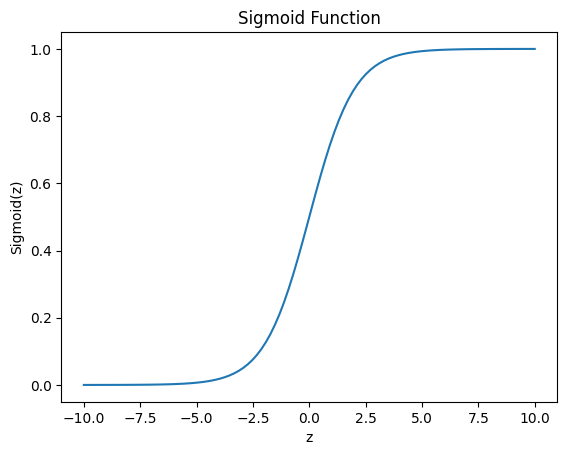

In [18]:
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure()
plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")

plt.savefig("images/sigmoid_curve.png")
plt.show()


## 📌 Sigmoid Function

Logistic Regression uses the Sigmoid function to convert linear output into probability.

The formula:

σ(z) = 1 / (1 + e^(-z))

The sigmoid function maps any real number into a value between 0 and 1, which represents probability.


## 📌 Final Conclusion

The Logistic Regression model achieved an accuracy of **97.37%** on the test dataset.

### Confusion Matrix Summary:
- True Negatives: 70
- False Positives: 1
- False Negatives: 2
- True Positives: 41

The model demonstrates strong classification performance with minimal errors. 
ROC-AUC score indicates excellent separability between benign and malignant classes.
The sigmoid function enables Logistic Regression to convert linear outputs into probabilities, making it suitable for binary classification problems.


Overall, Logistic Regression performed effectively for this binary classification task.
